**Kelompok 1_The Executor_IF-45-03**

# **Data Preprocessing**

*Tahap "Data Preprocessing" adalah tahap untuk mempersiapkan data **arrhythmia.data** sehingga siap untuk diolah.*

In [ ]:
# Memanggil semua library yang akan digunakan
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Membaca data mentah
raw_data = open("arrhythmia.data", "r")
lines = raw_data.readlines()
print(lines)

['75,0,190,80,91,193,371,174,121,-16,13,64,-2,?,63,0,52,44,0,0,32,0,0,0,0,0,0,0,44,20,36,0,28,0,0,0,0,0,0,52,40,0,0,0,60,0,0,0,0,0,0,52,0,0,0,0,0,0,0,0,0,0,0,0,56,36,0,0,32,0,0,0,0,0,0,48,32,0,0,0,56,0,0,0,0,0,0,80,0,0,0,0,0,0,0,0,0,0,0,0,40,52,0,0,28,0,0,0,0,0,0,0,48,48,0,0,32,0,0,0,0,0,0,0,52,52,0,0,36,0,0,0,0,0,0,0,52,48,0,0,32,0,0,0,0,0,0,0,56,44,0,0,32,0,0,0,0,0,0,-0.2,0.0,6.1,-1.0,0.0,0.0,0.6,2.1,13.6,30.8,0.0,0.0,1.7,-1.0,0.6,0.0,1.3,1.5,3.7,14.5,0.1,-5.2,1.4,0.0,0.0,0.0,0.8,-0.6,-10.7,-15.6,0.4,-3.9,0.0,0.0,0.0,0.0,-0.8,-1.7,-10.1,-22.0,0.0,0.0,5.7,-1.0,0.0,0.0,-0.1,1.2,14.1,22.5,0.0,-2.5,0.8,0.0,0.0,0.0,1.0,0.4,-4.8,-2.7,0.1,-6.0,0.0,0.0,0.0,0.0,-0.8,-0.6,-24.0,-29.7,0.0,0.0,2.0,-6.4,0.0,0.0,0.2,2.9,-12.6,15.2,-0.1,0.0,8.4,-10.0,0.0,0.0,0.6,5.9,-3.9,52.7,-0.3,0.0,15.2,-8.4,0.0,0.0,0.9,5.1,17.7,70.7,-0.4,0.0,13.5,-4.0,0.0,0.0,0.9,3.9,25.5,62.9,-0.3,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8\n', '56,1,165,64,81,174,401,149,39,25,37,-17,31,?,53,0,48,0,0,0,24,0,0,0,0,0,0,0,64,0,0,0,

In [ ]:
# Mengubah data mentah menjadi dataframe

# Inisialisasi list entries
entries = []

# Melakukan iterasi pada setiap baris file
for line in lines:
  # Memisahkan data yang diberikan pada setiap baris berdasarkan koma (,)
  data = line.strip().split(",")
  # Inisialisasi penampung entry (dictionary)
  entry = {}
  # Inisialisasi starting point untuk looping
  loop = 1
  # Inisialisasi atribut (untuk atribut yang berulang pada setiap channel akan dilakukan perulangan)
  for i, value in enumerate(data):
    order = i + 1
    attribute = ""
    if order == 1:
      attribute = "age"
    elif order == 2:
      attribute = "sex"
    elif order == 3:
      attribute = "height"
    elif order == 4:
      attribute = "weight"
    elif order == 5:
      attribute = "QRS_duration"
    elif order == 6:
      attribute = "P-R_interval"
    elif order == 7:
      attribute = "Q-T_interval"
    elif order == 8:
      attribute = "T_interval"
    elif order == 9:
      attribute = "P_interval"
    elif order == 10:
      attribute = "QRS_vector_angle"
    elif order == 11:
      attribute = "T_vector_angle"
    elif order == 12:
      attribute = "P_vector_angle"
    elif order == 13:
      attribute = "QRST_vector_angle"
    elif order == 14:
      attribute = "J_vector_angle"

    elif order == 15:
      attribute = "heart_rate"

    elif 16 <= order <= 159:
      head = ""
      if 16 <= order <= 27:
        head = "DI_"
      elif 28 <= order <= 39:
        head = "DII_"
      elif 40 <= order <= 51:
        head = "DIII_"
      elif 52 <= order <= 63:
        head = "AVR_"
      elif 64 <= order <= 75:
        head = "AVL_"
      elif 76 <= order <= 87:
        head = "AVF_"
      elif 88 <= order <= 99:
        head = "V1_"
      elif 100 <= order <= 111:
        head = "V2_"
      elif 112 <= order <= 123:
        head = "V3_"
      elif 124 <= order <= 135:
        head = "V4_"
      elif 136 <= order <= 147:
        head = "V5_"
      elif 148 <= order <= 159:
        head = "V6_"

      if loop == 1:
        attribute = head + "Q_avg_width"
      elif loop == 2:
        attribute = head + "R_avg_width"
      elif loop == 3:
        attribute = head + "S_avg_width"
      elif loop == 4:
        attribute = head + "R'_avg_width"
      elif loop == 5:
        attribute = head + "S'_avg_width"
      elif loop == 6:
        attribute = head + "intrinsic_deflection"
      elif loop == 7:
        attribute = head + "R_ragged"
      elif loop == 8:
        attribute = head + "R_diphasic_deriv"
      elif loop == 9:
        attribute = head + "P_ragged"
      elif loop == 10:
        attribute = head + "P_diphasic_deriv"
      elif loop == 11:
        attribute = head + "T_ragged"
      elif loop == 12:
        attribute = head + "T_diphasic_deriv"

      if loop == 12:
        loop = 1
      else:
        loop += 1

    elif 160 <= order <= 279:
      head = ""
      if 160 <= order <= 169:
        head = "DI_"
      elif 170 <= order <= 179:
        head = "DII_"
      elif 180 <= order <= 189:
        head = "DIII_"
      elif 190 <= order <= 199:
        head = "AVR_"
      elif 200 <= order <= 209:
        head = "AVL_"
      elif 210 <= order <= 219:
        head = "AVF_"
      elif 220 <= order <= 229:
        head = "V1_"
      elif 230 <= order <= 239:
        head = "V2_"
      elif 240 <= order <= 249:
        head = "V3_"
      elif 250 <= order <= 259:
        head = "V4_"
      elif 260 <= order <= 269:
        head = "V5_"
      elif 270 <= order <= 279:
        head = "V6_"

      if loop == 1:
        attribute = head + "JJ_ampl"
      elif loop == 2:
        attribute = head + "Q_ampl"
      elif loop == 3:
        attribute = head + "R_ampl"
      elif loop == 4:
        attribute = head + "S_ampl"
      elif loop == 5:
        attribute = head + "R'_ampl"
      elif loop == 6:
        attribute = head + "S'_ampl"
      elif loop == 7:
        attribute = head + "P_ampl"
      elif loop == 8:
        attribute = head + "T_ampl"
      elif loop == 9:
        attribute = head + "QRSA"
      elif loop == 10:
        attribute = head + "QRSTA"

      if loop == 10:
        loop = 1
      else:
        loop += 1

    elif order == 280:
      attribute = "class"

    # Menempatkan nilai pada atributnya
    entry[attribute] = value

  # Menambahkan entry ke list entries
  entries.append(entry)

# Membentuk dataframe dari list entries yang sudah diisi
df = pd.DataFrame(entries)

# Menampilkan dataframe
df

,age,sex,height,weight,QRS_duration,P-R_interval,Q-T_interval,T_interval,P_interval,QRS_vector_angle,...,V6_Q_ampl,V6_R_ampl,V6_S_ampl,V6_R'_ampl,V6_S'_ampl,V6_P_ampl,V6_T_ampl,V6_QRSA,V6_QRSTA,class
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,53,1,160,70,80,199,382,154,117,-37,...,.0,4.3,-5.0,.0,.0,.7,.6,-4.4,-.5,1
448,37,0,190,85,100,137,361,201,73,86,...,.0,15.6,-1.6,.0,.0,.4,2.4,38.0,62.4,10
449,36,0,166,68,108,176,365,194,116,-85,...,.0,16.3,-28.6,.0,.0,1.5,1.0,-44.2,-33.2,2
450,32,1,155,55,93,106,386,218,63,54,...,-.4,12.0,-.7,.0,.0,.5,2.4,25.0,46.6,1


## **Data Info**

In [ ]:
# Menampilkan 10 entri teratas pada dataframe
df.head(10)

,age,sex,height,weight,QRS_duration,P-R_interval,Q-T_interval,T_interval,P_interval,QRS_vector_angle,...,V6_Q_ampl,V6_R_ampl,V6_S_ampl,V6_R'_ampl,V6_S'_ampl,V6_P_ampl,V6_T_ampl,V6_QRSA,V6_QRSTA,class
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7
5,13,0,169,51,100,167,321,174,91,107,...,-0.6,12.2,-2.8,0.0,0.0,0.9,2.2,13.5,31.1,14
6,40,1,160,52,77,129,377,133,77,77,...,0.0,6.5,0.0,0.0,0.0,0.4,1.0,14.3,20.5,1
7,49,1,162,54,78,0,376,157,70,67,...,0.0,8.2,-1.9,0.0,0.0,0.1,0.5,15.8,19.8,1
8,44,0,168,56,84,118,354,160,63,61,...,0.0,7.0,-1.3,0.0,0.0,0.6,2.1,12.5,30.9,1
9,50,1,167,67,89,130,383,156,73,85,...,-0.6,10.8,-1.7,0.0,0.0,0.8,0.9,20.1,25.1,10


In [ ]:
# Menampilkan informasi dari data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Columns: 280 entries, age to class
dtypes: object(280)
memory usage: 988.9+ KB


In [ ]:
# Menampilkan deskripsi dari data
df.describe()

,age,sex,height,weight,QRS_duration,P-R_interval,Q-T_interval,T_interval,P_interval,QRS_vector_angle,...,V6_Q_ampl,V6_R_ampl,V6_S_ampl,V6_R'_ampl,V6_S'_ampl,V6_P_ampl,V6_T_ampl,V6_QRSA,V6_QRSTA,class
count,452,452,452,452,452,452,452,452,452,452,...,452,452,452,452,452,452,452,452,452,452
unique,77,2,53,76,67,106,132,129,90,160,...,29,136,64,4,2,36,82,286,333,13
top,46,1,160,80,82,0,383,152,100,62,...,0.0,8.5,0.0,0.0,0.0,0.4,1.5,24.0,19.7,1
freq,15,249,81,29,20,18,12,15,18,10,...,240,9,120,350,353,62,20,6,4,245


## **Data Cleaning**

Tinjau bahwa meskipun data telah dikonversi menjadi sebuah dataframe, data tersebut masih memiliki banyak missing values dan ambiguitas pada nilainya. Sehingga, tahap pembersihan data perlu dilakukan.

**Handle Missing Values**

In [ ]:
# Menghitung banyaknya entri dengan nilai "?"
count = df.isin(['?']).any(axis=1).sum()
print("Number of entries with '?':", count)

Number of entries with '?': 384


In [ ]:
# Mengubah "?" menjadi missing values (NaN)
df.replace('?', np.nan, inplace=True)

# Melakukan pengecekan apakah masih ada "?"
count = df.isin(['?']).any(axis=1).sum()
print("Number of entries with '?':", count, end="\n\n")

# Mengubah semua nilai pada data menjadi numerik
df = df.apply(pd.to_numeric)

# Melakukan pengecekan apakah data sudah menjadi numerik
df.info()

# Mengisi missing values (NaN) dengan nilai rata-rata atribut
df.fillna(df.mean(), inplace=True)

# Menghitung banyaknya nilai NaN pada dataframe
nan_count = df.isna().sum().sum()
print("\nTotal NaN count:", nan_count)

Number of entries with '?': 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Columns: 280 entries, age to class
dtypes: float64(125), int64(155)
memory usage: 988.9 KB

Total NaN count: 0


In [ ]:
# Drop atribut yang hanya berisi nilai 0
df = df.loc[:, (df != 0).any(axis=0)]

In [ ]:
df

,age,sex,height,weight,QRS_duration,P-R_interval,Q-T_interval,T_interval,P_interval,QRS_vector_angle,...,V6_JJ_ampl,V6_Q_ampl,V6_R_ampl,V6_S_ampl,V6_R'_ampl,V6_P_ampl,V6_T_ampl,V6_QRSA,V6_QRSTA,class
0,75,0,190,80,91,193,371,174,121,-16,...,-0.3,0.0,9.0,-0.9,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,-0.5,0.0,8.5,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.9,0.0,9.5,-2.4,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.1,0.0,12.2,-2.2,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,-0.4,0.0,13.1,-3.6,0.0,-0.1,3.9,25.4,62.8,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,53,1,160,70,80,199,382,154,117,-37,...,0.0,0.0,4.3,-5.0,0.0,0.7,0.6,-4.4,-0.5,1
448,37,0,190,85,100,137,361,201,73,86,...,-0.5,0.0,15.6,-1.6,0.0,0.4,2.4,38.0,62.4,10
449,36,0,166,68,108,176,365,194,116,-85,...,1.2,0.0,16.3,-28.6,0.0,1.5,1.0,-44.2,-33.2,2
450,32,1,155,55,93,106,386,218,63,54,...,0.2,-0.4,12.0,-0.7,0.0,0.5,2.4,25.0,46.6,1


**Handle Outlier**

In [ ]:
from sklearn.neighbors import LocalOutlierFactor

# Inisialisasi model Local Outlier Factor untuk mendeteksi outlier
model = LocalOutlierFactor(contamination=0.05)

# Melakukkan fitting data terhadap model
model.fit_predict(df)

# Mengambil nilai outlier
outlier_scores = model.negative_outlier_factor_

# Menentukan batasan toleransi nilai outlier
threshold = -1.02   # nilai ini didapatkan dari hasil uji coba berbagai macam threshold

# Memfilter dataframe berdasarkan batasan toleransi nilai outlier yang telah ditentukan
df = df[outlier_scores >= threshold]
df = df.reset_index()
df = df.drop('index',axis=1)

In [ ]:
df

,age,sex,height,weight,QRS_duration,P-R_interval,Q-T_interval,T_interval,P_interval,QRS_vector_angle,...,V6_JJ_ampl,V6_Q_ampl,V6_R_ampl,V6_S_ampl,V6_R'_ampl,V6_P_ampl,V6_T_ampl,V6_QRSA,V6_QRSTA,class
0,50,1,167,67,89,130,383,156,73,85,...,-0.5,-0.6,10.8,-1.7,0.0,0.8,0.9,20.1,25.1,10
1,45,1,165,86,77,143,373,150,65,12,...,0.1,0.0,4.4,-2.2,0.0,0.5,1.5,4.9,17.2,1
2,47,1,150,48,75,132,350,169,65,36,...,0.0,0.0,7.7,-0.8,0.0,0.6,1.7,17.2,31.1,1
3,36,1,153,75,71,132,364,169,82,62,...,-0.1,0.0,8.9,-1.0,0.0,0.5,1.7,19.7,34.3,1
4,57,1,165,59,75,157,406,143,92,4,...,0.7,0.0,6.7,-0.5,0.0,0.4,1.1,18.4,28.9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,36,0,171,93,87,150,362,177,96,44,...,0.2,0.0,10.3,-0.8,0.0,0.6,3.0,24.1,52.9,1
98,47,0,166,56,79,145,381,173,101,52,...,-0.6,0.0,8.5,0.0,0.0,0.6,1.2,20.4,29.0,6
99,39,1,164,62,79,155,367,153,95,50,...,-0.1,0.0,9.7,-0.7,0.0,0.8,1.3,24.1,33.7,1
100,35,1,155,63,87,142,391,137,88,66,...,-0.6,0.0,10.7,0.0,0.0,1.0,2.1,25.6,43.2,1


# **Exploratory Data Analysis (EDA)**

*Setelah melakukan prapemrosesan data, Exploratory Data Analysis (EDA) dilakukan untuk memperoleh informasi lebih dalam terkait data yang disajikan. Dalam kasus ini, informasi utama yang ingin diperoleh adalah hal apa saja yang memengaruhi klasifikasi kelas Arrhythmia seseorang.*


## **Pengecekan korelasi aspek fisik individu dengan kelas Arrhythmia**

Aspek fisik individu yang meliputi usia, jenis kelamin, tinggi badan, dan berat badan akan ditinjau seberapa tinggi nilai korelasinya terhadap klasifikasi kelas Arrhythmia.

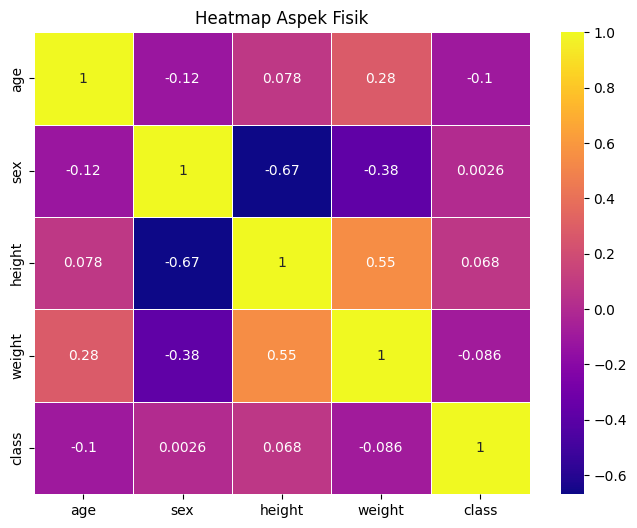

In [ ]:
# Membuat dataframe baru yang hanya melibatkan atribut usia, jenis kelamin, tinggi badan, berat badan, dan kelas Arrhythmia
subset_df = df[['age', 'sex', 'height', 'weight', 'class']]

# Menghitung matrix korelasi
correlation_matrix = subset_df.corr()

# Membuat heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='plasma', linewidths=0.5)
plt.title('Heatmap Aspek Fisik')
plt.show()

Tinjau bahwa aspek fisik seseorang memiliki korelasi yang sangat kecil, bahkan hampir tidak ada, terhadap klasifikasi kelas Arrhythmia seseorang. Melalui informasi ini dapat diasumsikan bahwa pengklasifikasian kelas Arrhythmia seseorang tidak dapat dilakukan secara kasat mata, melainkan harus berlandaskan hasil yang diberikan oleh mesin ECG.

## **Pengecekan korelasi atribut mesin ECG dengan kelas Arrhythmia**

Oleh karena aspek fisik individu memiliki korelasi yang sangat rendah terhadap klasifikasi kelas Arrhythmia seseorang, maka beberapa atribut mesin akan ditinjau korelasinya terhadap kelas Arrhythmia seseorang. Beberapa atribut mesin yang ditinjau adalah QRS_duration dan nilai QRSTA setiap channel mesin ECG dengan alasan bahwa atribut-atribut tersebut merupakan simpulan dari observasi semua gelombang pada mesin ECG.

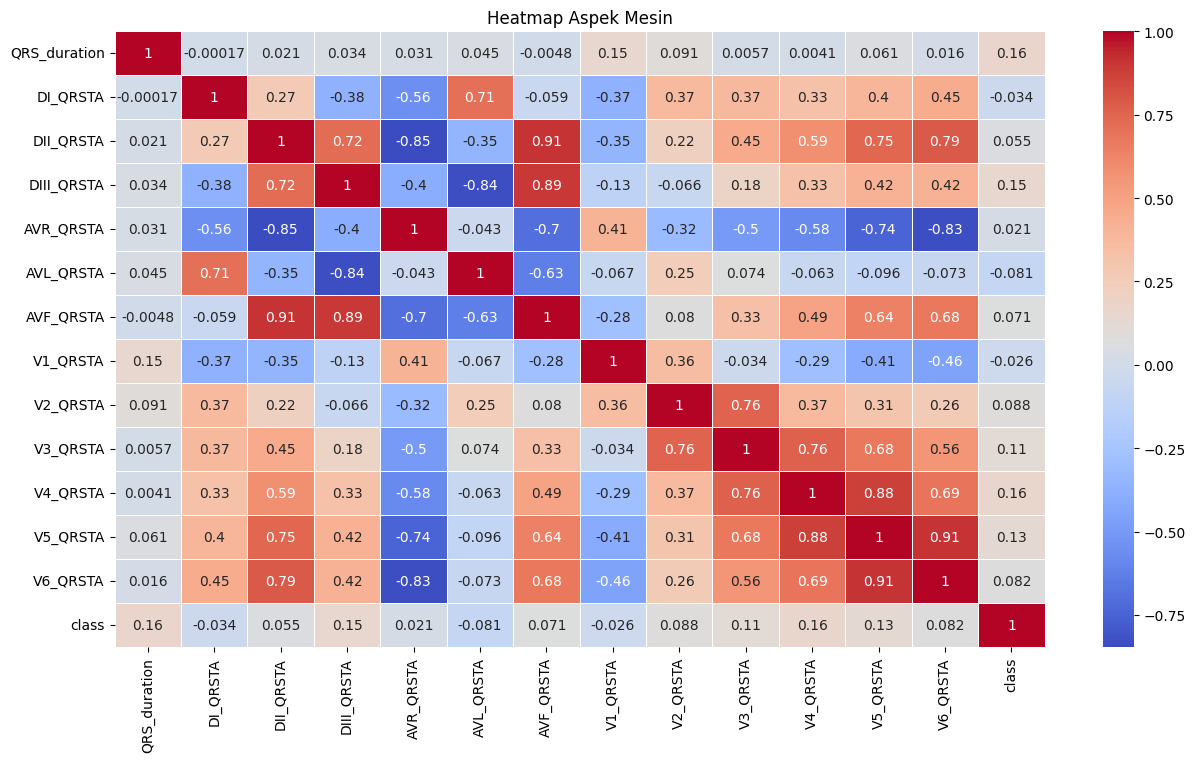

In [ ]:
# Membuat dataframe baru yang hanya melibatkan atribut mesin ECG
subset_df = df[['QRS_duration','DI_QRSTA','DII_QRSTA','DIII_QRSTA','AVR_QRSTA','AVL_QRSTA','AVF_QRSTA','V1_QRSTA','V2_QRSTA','V3_QRSTA','V4_QRSTA','V5_QRSTA','V6_QRSTA','class']]

# Menghitung matrix korelasi
correlation_matrix = subset_df.corr()

# Membuat heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap Aspek Mesin')
plt.show()

Perhatikan bahwa meskipun tidak ada perbedaan yang signifikan, atribut mesin ECG memiliki korelasi terhadap kelas Arrhythmia seseorang yang lebih besar daripada korelasi aspek fisik individu terhadap kelas Arrhythmia. Dengan demikian dapat disimpulkan bahwa pengklasifikasian kelas Arrhythmia seseorang tidak dapat dilakukan secara kasat mata, melainkan memerlukan peralatan khusus seperti mesin ECG.

## **Visualisasi**

Selain meninjau korelasi, data tersebut dapat divisualisasikan untuk mendapatkan beberapa informasi tambahan baru.

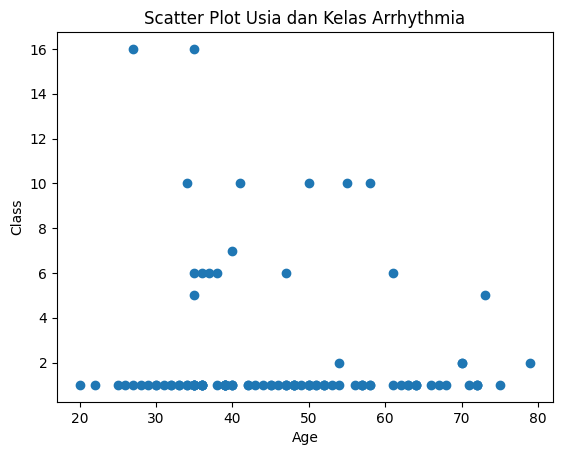

In [ ]:
# Menentukan nilai yang akan digunakan untuk axis x dan y
x = df['age']
y = df['class']

# Membuat scatter plot
plt.scatter(x, y)

# Menambahkan label dan judul
plt.xlabel('Age')
plt.ylabel('Class')
plt.title('Scatter Plot Usia dan Kelas Arrhythmia')

# Menampilkan plot
plt.show()

Berdasarkan visualisasi di atas dapat dilihat bahwa orang yang berusia sekitar 27 dan 35 tahun cenderung memiliki Arrhythmia yang belum pernah ditemukan sebelumnya. Di satu sisi, orang yang berusia sekitar 35-40 tahun cenderung rentan memiliki Arrhythmia, terutama Arrhythmia kelas 6.

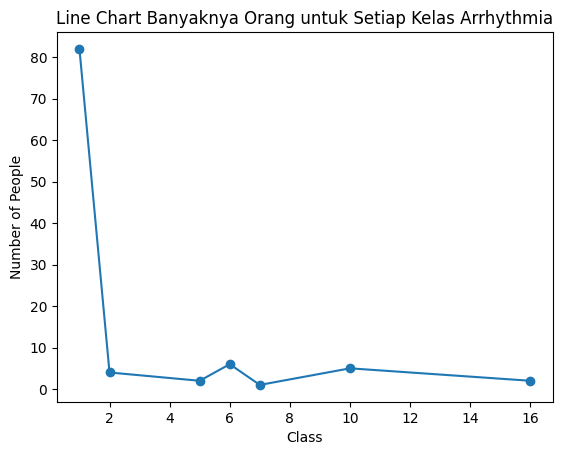

In [ ]:
# Menghitung banyaknya orang terhadap setiap kelas Arrhythmia yang dimilikinya
count_class = df['class'].value_counts().sort_index()

# Membuat line chart
plt.plot(count_class.index, count_class.values, marker='o')

# Menambahkan label dan judul
plt.xlabel('Class')
plt.ylabel('Number of People')
plt.title('Line Chart Banyaknya Orang untuk Setiap Kelas Arrhythmia')

# Menampilkan chart
plt.show()

Melalui visualisasi di atas dapat disimpulkan bahwa sebagian besar orang tidak memiliki gangguan irama jantung. Bahkan, kasus Arrhythmia kelas atas sangat sedikit ditemukan pada individu yang diobservasi, sebagian besar memiliki Arrhythmia kelas menengah.

# **Learning**

In [ ]:
# Mengubah kelas Arrhythmia 2-16 menjadi 0 (1: sehat, 0: gangguan irama jantung)
df['class'] = df['class'].apply(lambda x: 0 if x >= 2 else x)

df['class'].unique()

array([0, 1])

**Naive Bayes (Gaussian)**

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

# Memisahkan data menjadi x dan y (target)
X = df.drop(columns=['class'])
y = df['class']

# Memisahkan data menjadi data train dan data test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75, random_state=42)

# Membuat model Naive Bayes (Gaussian)
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)

# Membuat prediksi terhadap data test
y_pred = gnb_model.predict(X_test)

# Menampilkan report
report = classification_report(y_test, y_pred)
print(report)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

              precision    recall  f1-score   support

           0       0.09      0.15      0.11        13
           1       0.80      0.69      0.74        64

    accuracy                           0.60        77
   macro avg       0.45      0.42      0.43        77
weighted avg       0.68      0.60      0.63        77

Accuracy: 0.5974025974025974


**K-NN**

In [ ]:
# Memisahkan data menjadi data train dan data test
def folding(dataset, trainingPercentage, location, shuffle:bool):
  lengthTraining = int(len(dataset)*trainingPercentage/100)

  # Mengacak posisi data
  if(shuffle):
    dataset = dataset.sample(frac=1).reset_index(drop=True)
  train = []
  validation = []

  # Memilih lokasi data train dan data test
  if(location == 'left'):
    train, validation = dataset.iloc[:lengthTraining].reset_index(drop=True), dataset.iloc[lengthTraining:].reset_index(drop=True)
  elif(location == 'right'):
    validation,train = dataset.iloc[:abs(lengthTraining-len(dataset))].reset_index(drop=True), dataset.iloc[abs(lengthTraining-len(dataset)):].reset_index(drop=True)
  elif(location == 'middle'):
    train = dataset.iloc[int(abs(lengthTraining-len(dataset))/2):len(dataset)-int(abs(lengthTraining-len(dataset))/2)]
    validation = pd.concat([dataset.iloc[:int(abs(lengthTraining-len(dataset))/2)],dataset.iloc[len(dataset)-int(abs(lengthTraining-len(dataset))/2):]])
  return train, validation

In [ ]:
# Membuat fungsi kalkulasi jarak Euclidean
def euclidean(x1,x2):
  return np.sqrt(np.sum((x1 - x2)**2))

In [ ]:
# Membuat fungsi normalisasi minmax
def norm(df):
  df = (df-df.min()) / (df.max()-df.min())
  return df

In [ ]:
# Membuat fungsi perhitungan akurasi
def accuracy(y_pred, y_true):
  true_c = 0
  for i in range(len(y_pred)):
    if y_pred[i] == y_true[i]:
      true_c+=1
  return true_c/len(y_true)

In [ ]:
# Membuat fungsi kalkulasi knn
def knn(x_train, y_train, x_test,k):
  dist = []

  # Menghitung jarak antar data
  for row in range(x_train.shape[0]):
    dist.append(euclidean(x_train.iloc[row], x_test))

  # Mengurutkan data berdasarkan jarak
  data = x_train.copy()
  data['dist'] = dist
  data['Class'] = y_train
  data = data.sort_values(by='dist').reset_index(drop=True)

  # Mencari modus k data terdekat
  y_pred = data.iloc[:k].Class.mode()
  return y_pred[0]

In [ ]:
# Membuat fungsi evaluasi
def evaluate(fold, k):
  # Memisahkan data train dan data test
  train, test = folding(fold, 75, 'left', shuffle=True)
  x_train, y_train = train.drop('class', axis=1), train['class']
  x_test, y_test = test.drop('class', axis=1), test['class']

  # Normalisasi data
  x_train = norm(x_train)
  x_test = norm(x_test)
  y_pred = []

  # Membuat prediksi
  for row in range(x_test.shape[0]):
    y_pred.append(knn(x_train, y_train, x_test.iloc[row],k))

  # Menghitung akurasi
  return accuracy(y_pred, y_test)

In [ ]:
# Inisialisasi nilai k
k = 3

# Melakukan perulangan untuk mencari nilai k terbaik
for i in range(5):
  counter = i+1
  akurasi = evaluate(df, counter*k)
  print(f"Menggunakan k: {counter*k}, dengan akurasi: {akurasi}")

Menggunakan k: 3, dengan akurasi: 0.6923076923076923
Menggunakan k: 6, dengan akurasi: 0.8461538461538461
Menggunakan k: 9, dengan akurasi: 0.7692307692307693
Menggunakan k: 12, dengan akurasi: 0.7692307692307693
Menggunakan k: 15, dengan akurasi: 0.8076923076923077
